In [1]:
import pandas as pd 
import numpy as np 
import json 
import requests
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from cycler import cycler

In [2]:
#changeing the outo option for show rows and columns.
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Gathering data 

#### In our task, we have three database one of them come from twitter API but unfortunately they decline my application.

In [3]:
#import tweepy 

#consumer_key = 'xxxx'
#consumer_secret = 'xxxxxx'
#access_token = 'xxxxx'
#access_secret = 'xxxxxx'

#auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
#auth.srt_access_token(access_token,access_secret)
#api = tweepy.API(auth)

In [4]:
dff = pd.read_csv("twitter-archive-enhanced.csv")

#### Make a copy for echae data.

In [5]:
df = dff.copy()

In [6]:
with open('tweet-json.txt', 'r') as file:
    tweet = []
    for line in file:
        tweet.append(json.loads(line))

In [7]:
#Make a copy
df_jsonn = pd.DataFrame(tweet)

In [8]:
#Make a copy
df_json = df_jsonn.copy()

In [9]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open(os.path.join("image-predictions.tsv"),mode = "wb") as file:
    file.write(response.content)

    
image_prediction_dff = pd.read_csv("image-predictions.tsv", sep = "\t")

In [10]:
#Make a copy
image_prediction_df = image_prediction_dff.copy()

In [78]:
#load the Image predictions tsv file
image_prediction_dff = pd.read_csv('image-predictions.tsv', sep='\t')

# Assessing data 

#### In assessing part we try to find the issue and find solution. 

#### frist i exlporeing the data and try to find nuggets, useing all technique i know, like heead and shape & info & describe and duplicated and isnull & data types, and repet it in all database to understand the data and find nuggets.

In [11]:
#frist i exlporeing the data and try to find nuggets, useing all technique i know, like heead and shape & info & describe
# and duplicated and isnull & dtypes, and repet it in all database to understand the data and find nuggets.
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [12]:
#show shape of data 
df.shape[0]

2356

In [13]:
#show the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
#describe the data

df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
#check for null
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [16]:
#check for duplicated

df.duplicated().sum()

0

In [17]:
#check for data type

df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [18]:
df["doggo"].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [19]:
df["floofer"].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [20]:
df["pupper"].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [21]:
df["puppo"].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [22]:
#I repeat the method i used to exploring the data
df_json.head(2)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,892420643555336193,892420643555336193,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,892177421306343426,892177421306343426,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [23]:
#show shape of data

df_json.shape[0]

2354

In [24]:
#show the information of data

df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [25]:
#describe the data

df_json.describe()

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count
count,2354.000000,2.354000e+03,7.800000e+01,7.800000e+01,2.900000e+01,2354.000000
mean,8080.968564,7.426978e+17,7.455079e+17,2.014171e+16,8.162686e+17,3164.797366
std,11814.771334,6.852812e+16,7.582492e+16,1.252797e+17,6.164161e+16,5284.770364
min,0.000000,6.660209e+17,6.658147e+17,1.185634e+07,6.721083e+17,0.000000
25%,1415.000000,6.783975e+17,6.757419e+17,3.086374e+08,7.888183e+17,624.500000
50%,3603.500000,7.194596e+17,7.038708e+17,4.196984e+09,8.340867e+17,1473.500000
75%,10122.250000,7.993058e+17,8.257804e+17,4.196984e+09,8.664587e+17,3652.000000
max,132810.000000,8.924206e+17,8.862664e+17,8.405479e+17,8.860534e+17,79515.000000


In [26]:
#check for null

df_json.isnull().sum()

contributors                     2354
coordinates                      2354
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 281
favorite_count                      0
favorited                           0
full_text                           0
geo                              2354
id                                  0
id_str                              0
in_reply_to_screen_name          2276
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
is_quote_status                     0
lang                                0
place                            2353
possibly_sensitive                143
possibly_sensitive_appealable     143
quoted_status                    2326
quoted_status_id                 2325
quoted_status_id_str             2325
retweet_count                       0
retweeted   

In [27]:
#i repeat the method i used to exploring the data
image_prediction_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [28]:
#show shape of data

image_prediction_df.shape[0]

2075

In [29]:
#show the information of data

image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
#describe the data

image_prediction_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [31]:
#check for null

image_prediction_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [32]:
#check for duplicated

image_prediction_df.duplicated().sum()

0

## we find too many issues but we take some of them and try to prepare the data for analysis.
# Quality :

### In twitter-archive-enhanced.csv :

Rating it should not more than 10. 

I have a lot of missing values and duplicated columnsin (in_reply_to_status_id , in_reply_to_user_id , retweeted_status_id , retweeted_status_user_id , retweeted_status_timestamp ).

I don't have any duplicated (This is comfortable ). (:

Timestamp type it’s should datetime not a object.

I can merge these four columns ( doggo , floofer , pupper , puppo ) in to one.  

The null values inside the four columns ( doggo , floofer , pupper , puppo ) it should  come as (null) not (None).



### In Tweet_json.txt:

I have a lot of missing values(Tweet_json.txt)  in (contributors , coordinates, geo, in_reply_to_screen_name , in_reply_to_status_id , in_reply_to_status_id_str , in_reply_to_user_id , in_reply_to_user_id_str , place , quoted_status , quoted_status_id , quoted_status_id_str , retweeted_status ).

display_text_range contain multi value, so we need to divide it to 2 columns

### In Image_prediction:

in image_prediction there is no column for most confidence breed of dogs.

there are missing tweets since the tweets in tweet_archeve are 2356 and in image_prediction are 2075.

we need tweet with images together





#### there are missing tweets since the tweets in tweet_archeve are 2356 and in image_prediction are 2075.
#### we need tweet with images together


# Tidiness :


1- All three database it's should be in one dataframe.

2-All columns 'doggo','floof', 'pupper' and 'puppo' it should in one column.

3-some columns like "in_reply_to_status_id and" they have too many missing value, my opinion is deleting them.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

# Data cleaning

## Issue 
### 1- I have a lot of missing valuesa and duplicated columns in (in_reply_to_status_id , in_reply_to_user_id , retweeted_status_id , retweeted_status_user_id , retweeted_status_timestamp ), so i drop unwanted columns . 


## Code


In [34]:
#i drop unwanted columns.
df = df.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id' , 'retweeted_status_timestamp'], axis=1)


## Test


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


## Issue 
### 2- convert tweet_id from float to string


## Code


In [36]:
# convert tweet_id from float to string
df.tweet_id = df.tweet_id.astype(str)

## Test


In [37]:
df.dtypes

tweet_id              object
timestamp             object
source                object
text                  object
expanded_urls         object
rating_numerator       int64
rating_denominator     int64
name                  object
doggo                 object
floofer               object
pupper                object
puppo                 object
dtype: object

## Issue 
### 3 - The null values inside the four columns ( doggo , floofer , pupper , puppo ) it should  come as (null) not (None), so replaceing the none in doggo and floofer and pupper and puppo columns as null.


## Code


In [38]:
#replaceing the none in doggo and floofer and pupper and puppo columns as null.
df["doggo"] = df["doggo"].replace("None", "")
df["floofer"] = df["floofer"].replace("None", "")
df["pupper"] = df["pupper"].replace("None", "")
df["puppo"] = df["puppo"].replace("None", "")

## Test


In [39]:
df["puppo"].value_counts()

         2326
puppo      30
Name: puppo, dtype: int64

## Issue 
### 4- I can merge these four columns ( doggo , floofer , pupper , puppo ) in to one, so i merge all these doggo and floofer and pupper and puppo columns to one columns.



## Code

In [40]:
#i merge all these doggo and floofer and pupper and puppo columns to one columns.
df["dog_stage"] = df["doggo"] + df["floofer"] + df["pupper"] + df["puppo"]


## Test


In [41]:
df["dog_stage"].value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [42]:
#replaceing the speace as null.
df["dog_stage"] = df["dog_stage"].replace('',np.nan)
df["dog_stage"].value_counts()

pupper          245
doggo            83
puppo            29
doggopupper      12
floofer           9
doggofloofer      1
doggopuppo        1
Name: dog_stage, dtype: int64

## Issue 
### 5-  i fund a non type in dog_stage columns, so i replacing them to understanding them.

In [43]:
df.loc[df["dog_stage"] == "doggofloofer", "dog_stage"] = "dpggp, floofer"
df.loc[df["dog_stage"] == "doggopupper", "dog_stage"] = "doggo, puppo"
df.loc[df["dog_stage"] == "doggopuppo", "dog_stage"] = "dpggp, puppo"


## Test


In [44]:
df["dog_stage"].value_counts()

pupper            245
doggo              83
puppo              29
doggo, puppo       12
floofer             9
dpggp, floofer      1
dpggp, puppo        1
Name: dog_stage, dtype: int64

## Issue 
### 6- i drop unwanted columns after we merge them 



## Code

In [45]:
df = df.drop(['doggo','floofer', 'pupper' , 'puppo'],axis=1)


## Test


In [46]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


## Issue 
## 7- coordinates, contributors, geo they are empty so drop it.


## Code

In [47]:
#drop unwanted columns.
df_json = df_json.drop(['contributors','coordinates','geo','in_reply_to_screen_name' , 'in_reply_to_screen_name', 'in_reply_to_status_id' , 'in_reply_to_status_id_str' , 'in_reply_to_user_id' , 'in_reply_to_user_id_str' , 'place' , 'quoted_status' , 'quoted_status_id' , 'quoted_status_id_str' , 'retweeted_status' ], axis=1)
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 18 columns):
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
is_quote_status                  2354 non-null bool
lang                             2354 non-null object
possibly_sensitive               2211 non-null object
possibly_sensitive_appealable    2211 non-null object
retweet_count                    2354 non-null int64
retweeted                        2354 non-null bool
source                           2354 non-null object
truncated                        2354 

## Test


In [48]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 18 columns):
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
is_quote_status                  2354 non-null bool
lang                             2354 non-null object
possibly_sensitive               2211 non-null object
possibly_sensitive_appealable    2211 non-null object
retweet_count                    2354 non-null int64
retweeted                        2354 non-null bool
source                           2354 non-null object
truncated                        2354 

In [49]:
df_json.id = df_json.id.astype(str)

## Issue 
### 8- display_text_range contain multi value, we need only the second value. 


## Code

In [50]:
# Create a new list to store the value for the end of tweet
end_tweet= []
for i in df_json.display_text_range:
    end_tweet.append(i[1])

In [51]:
# assign the new value to the Display_text_range column
df_json.display_text_range = end_tweet

## Test


In [52]:
df_json.head(2)

,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,id,id_str,is_quote_status,lang,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,source,truncated,user
0,Tue Aug 01 16:23:56 +0000 2017,85,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,892420643555336193,False,en,False,False,8853,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,Tue Aug 01 00:17:27 +0000 2017,138,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,892177421306343426,892177421306343426,False,en,False,False,6514,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Issue 
### 9- create a new columns breed_confidence.


## Code


In [53]:
#create a new columns breed_confidence.
breed = []
confidence = []

def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Unidentifiable')
        confidence.append(0)
      

image_prediction_df.apply(breed_confidence, axis=1)
image_prediction_df['breed'] = breed
image_prediction_df['confidence'] = confidence


#note this code was taken from this source : http://empierce.com/2017/11/14/wrangling-weratedogs/

In [54]:
## Test


In [55]:
image_prediction_df.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


In [56]:
image_prediction_df.tweet_id = image_prediction_df.tweet_id.astype(str)

## Issue 
### 10- In p1, p2 and p3 some of the dog names wrote as lowercase and other  is uppercase.


## Code


In [57]:
image_prediction_df["p1"].value_counts()

golden_retriever                  150
Labrador_retriever                100
Pembroke                           89
Chihuahua                          83
pug                                57
chow                               44
Samoyed                            43
toy_poodle                         39
Pomeranian                         38
cocker_spaniel                     30
malamute                           30
French_bulldog                     26
miniature_pinscher                 23
Chesapeake_Bay_retriever           23
seat_belt                          22
Siberian_husky                     20
Staffordshire_bullterrier          20
German_shepherd                    20
Cardigan                           19
web_site                           19
Eskimo_dog                         18
teddy                              18
Shetland_sheepdog                  18
Maltese_dog                        18
beagle                             18
Shih-Tzu                           17
Rottweiler  

In [58]:
# convert all the values in columns to be as lowercase
image_prediction_df.p1 = image_prediction_df.p1.str.lower()
image_prediction_df.p2 = image_prediction_df.p2.str.lower()
image_prediction_df.p3 = image_prediction_df.p3.str.lower()

In [59]:
image_prediction_df["p1"].value_counts()

golden_retriever                  150
labrador_retriever                100
pembroke                           89
chihuahua                          83
pug                                57
chow                               44
samoyed                            43
toy_poodle                         39
pomeranian                         38
cocker_spaniel                     30
malamute                           30
french_bulldog                     26
chesapeake_bay_retriever           23
miniature_pinscher                 23
seat_belt                          22
german_shepherd                    20
staffordshire_bullterrier          20
siberian_husky                     20
web_site                           19
cardigan                           19
beagle                             18
shetland_sheepdog                  18
teddy                              18
eskimo_dog                         18
maltese_dog                        18
shih-tzu                           17
lakeland_ter

## Issue 
### 11-here i start to merge the data.


## Code


In [60]:
#here i start to merge the data.
merge_df = df.merge(df_json, right_on = "id", left_on = "tweet_id")

In [61]:
#final data merge.
all_data = merge_df.merge(image_prediction_df, right_on = "tweet_id", left_on = "tweet_id")

In [62]:
#chakeing the data before go to analysis.
all_data.shape[0]

2073

## Test


In [63]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 40 columns):
tweet_id                         2073 non-null object
timestamp                        2073 non-null object
source_x                         2073 non-null object
text                             2073 non-null object
expanded_urls                    2073 non-null object
rating_numerator                 2073 non-null int64
rating_denominator               2073 non-null int64
name                             2073 non-null object
dog_stage                        320 non-null object
created_at                       2073 non-null object
display_text_range               2073 non-null int64
entities                         2073 non-null object
extended_entities                2073 non-null object
favorite_count                   2073 non-null int64
favorited                        2073 non-null bool
full_text                        2073 non-null object
id                               207

In [64]:
all_data.describe()

,rating_numerator,rating_denominator,display_text_range,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf,confidence
count,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2.073000e+03,2.073000e+03,2073.000000
mean,12.265798,10.511819,111.586589,8556.718283,2976.089243,1.203570,0.594532,1.346665e-01,6.034005e-02,0.463326
std,40.699924,7.180517,26.261775,12098.640994,5054.897526,0.561856,0.271234,1.006830e-01,5.092769e-02,0.339142
min,0.000000,2.000000,13.000000,0.000000,16.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000
25%,10.000000,10.000000,94.000000,1674.000000,634.000000,1.000000,0.364095,5.390140e-02,1.619920e-02,0.139909
50%,11.000000,10.000000,116.000000,3864.000000,1408.000000,1.000000,0.588230,1.186220e-01,4.947150e-02,0.457117
75%,12.000000,10.000000,137.000000,10937.000000,3443.000000,1.000000,0.843911,1.955730e-01,9.193000e-02,0.772685
max,1776.000000,170.000000,148.000000,132810.000000,79515.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,0.999956


In [65]:
all_data.isnull().sum()

tweet_id                            0
timestamp                           0
source_x                            0
text                                0
expanded_urls                       0
rating_numerator                    0
rating_denominator                  0
name                                0
dog_stage                        1753
created_at                          0
display_text_range                  0
entities                            0
extended_entities                   0
favorite_count                      0
favorited                           0
full_text                           0
id                                  0
id_str                              0
is_quote_status                     0
lang                                0
possibly_sensitive                  0
possibly_sensitive_appealable       0
retweet_count                       0
retweeted                           0
source_y                            0
truncated                           0
user        

In [66]:
all_data.head(2)

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,id,id_str,is_quote_status,lang,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,source_y,truncated,user,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,Tue Aug 01 16:23:56 +0000 2017,85,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,892420643555336193,False,en,False,False,8853,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,Unidentifiable,0.000000
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,Tue Aug 01 00:17:27 +0000 2017,138,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,892177421306343426,892177421306343426,False,en,False,False,6514,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,0.323581


In [67]:
#drop unwanted columns.
all_data = all_data[all_data['jpg_url'].notnull()]

## Issue 
### 12- chane data type of timestamp.



## Code

In [68]:
# chane data type of timestamp.
all_data['timestamp'] = pd.to_datetime(all_data['timestamp'])

## Test


In [69]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 40 columns):
tweet_id                         2073 non-null object
timestamp                        2073 non-null datetime64[ns, UTC]
source_x                         2073 non-null object
text                             2073 non-null object
expanded_urls                    2073 non-null object
rating_numerator                 2073 non-null int64
rating_denominator               2073 non-null int64
name                             2073 non-null object
dog_stage                        320 non-null object
created_at                       2073 non-null object
display_text_range               2073 non-null int64
entities                         2073 non-null object
extended_entities                2073 non-null object
favorite_count                   2073 non-null int64
favorited                        2073 non-null bool
full_text                        2073 non-null object
id                     

In [70]:
#save the data as file csv
all_data.to_csv("final_data.csv")

In [80]:
#save the dataframe to CSV file

df.to_csv("twitter_archive_master.csv", index=False)

# Data Analysing
#### The basic and easy way to understand the data is plotting, in next section we will find some graph that help us to understand the database.

In [81]:
#This program code they organizing all the Graph automatics, size or color etc.
plt.rcParams['figure.figsize'] = [15.0, 7.0]
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['figure.facecolor'] = '0.75'
plt.rcParams['lines.markersize'] = np.sqrt(20)
plt.rcParams['patch.force_edgecolor'] = True
plt.rcParams['patch.facecolor'] = 'b'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

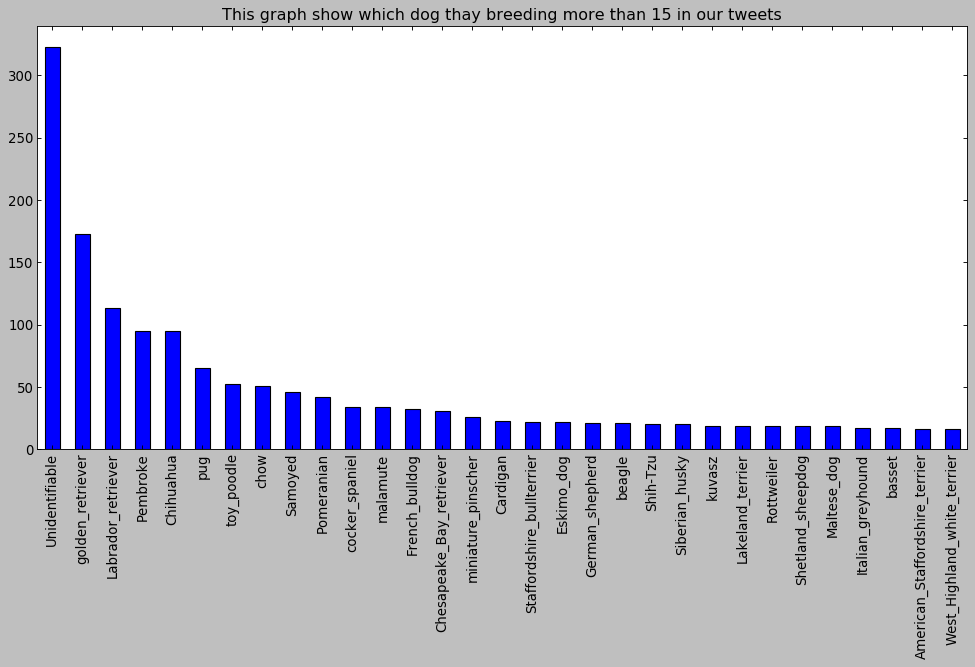

In [72]:
t_b = all_data.groupby('breed').filter(lambda x: len(x) > 15)
t_b['breed'].value_counts().plot(kind = 'bar',title = 'This graph show which dog thay breeding more than 15 in our tweets')

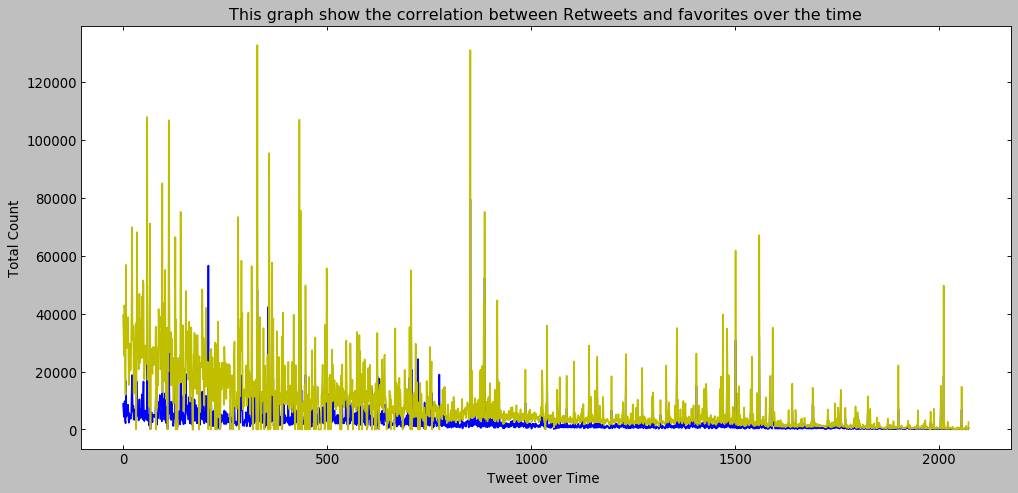

In [73]:
plt.plot( all_data['retweet_count'] , color = 'b')
plt.plot(all_data['favorite_count'], color = 'y')
plt.xlabel('Tweet over Time ')
plt.ylabel('Total Count')
plt.title('This graph show the correlation between Retweets and favorites over the time')
plt.show()

In [74]:
dog_stage = all_data[all_data['dog_stage'].notnull()]

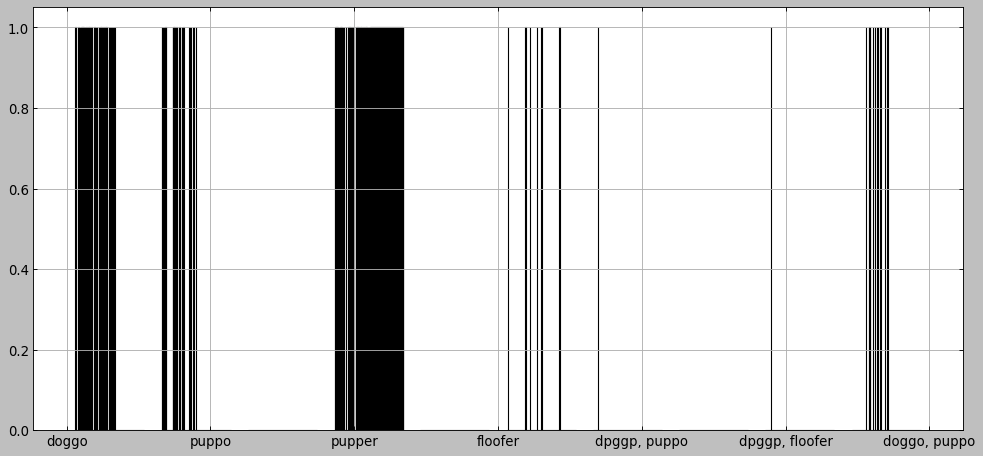

In [75]:
dog_stage.dog_stage.hist();

Text(0.5, 1.0, 'Dog stages')

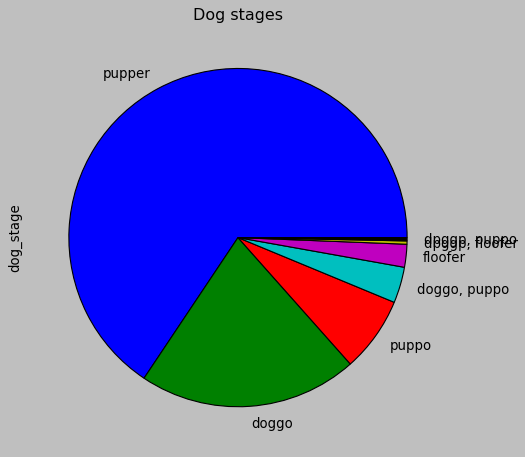

In [76]:
dog_stage[dog_stage['dog_stage'].notnull()]['dog_stage'].value_counts().plot(kind = 'pie')
plt.title('Dog stages')

In [77]:
#all_data.groupby('timestamp')['tweet_id'].mean().plot(title = 'This graph show the correlation between Dates and Tweetes')